# Machine Learning and Data Mining: Lab 04
---------------

## Exercise 1: Principal Component Analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a two-dimensional dataset:

In [4]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X.shape

(200, 2)

##### __Task (a) Visualize the data using a scatter plot__

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

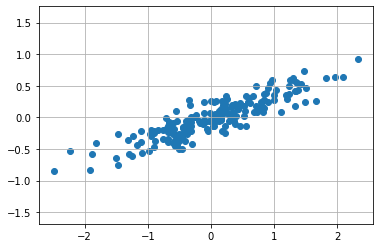

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.axis('equal') ##Passt die x und y Achse gleichmässig an.

##### __Task (b) Make a principal components analysis (PCA) using `sklearn.decomposition.PCA`__
- Install the package `scikit-learn`
- Specify the number of components equal to the number of dimensions

PCA(n_components=2)

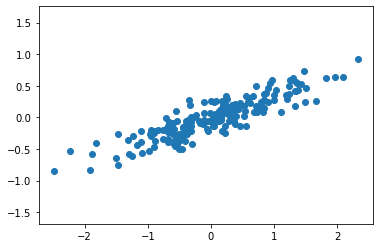

In [6]:
from sklearn.decomposition import PCA
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
pca = PCA(n_components=2)#2 Darum kann man maximal 2 PCA-Komponenten / 2 Achsen definieren
pca.fit(X)


##### __Task (c) Print the components and the explained variance__

In [7]:
#By eye, it is clear that there is a nearly linear relationship between the x and y variables.
#The Componetents discribe, how long the range is in de Matrix. i.e: how long the column is.
#The Variance explain how strong the linear Regression is.

In [8]:

print('Components')
print(pca.components_) #A*v = Lambda * v. Eigenwerte beschreiben die Varianz. Jeder Eigenvektor hat so viel Dimensionen wie er Punkt hat. 
                        #PCA hat soviel Attribute wie man Komponenten hat. 

print('Variance')
print(pca.explained_variance_)#largest components of the covarianz Matrix

Components
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Variance
[0.7625315 0.0184779]


##### __Task (d) Describe in your own words what the components and the explained variance are__

#Die Komponenten beschrieben die Richtung der maximale Varianz
#Die Varianz beschreibt auch, wieviel von der Varianz die Komponente beschreibt.

##### __We visualize these numbers as vectors: Describe where in the plot below you can see the components and the explained variance__

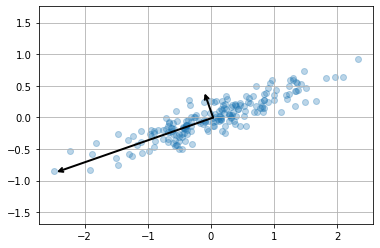

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):#geht durch alle Vektoren 
    v = vector * 3 * np.sqrt(length) #Vektor berechnen = länge * Eigenvektor
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal')
plt.grid()

Die Vektoren beschreiben die Komponentene.
Die Länge der Vektoren beschrieben die Varianz

Die Vektoren beschrieben das verhalten der Daten. Die Länge der Vektoren ist ein Indiz, welche die Eigenschaft besitzt wie "wichtig" die Verteilung der Daten sind. Es ist eine Masseinheit für die Varianz von den Daten in der Axe. Die Projektion jeder Daten auf der Axe, sind die Wichtigen Komponenten die man anzeigen möchte.

##### __Task (e) Reduce the dimensionality__

So far, we only calculated the principal components - That's cool but doesn't help a lot. Next, we reduce the dimensionality of the data so that we have only one dimension left:

- **Reduce the dimensionality of the data to one dimension**

In [10]:
pca = PCA(n_components=1) #X wird auf Dimension 1 heruntergerechnet.
pca.fit(X)
X_pca = projected = pca.fit_transform(X)
print('Original Shape: ', X.shape)
print('Transformierte Shape: ', X_pca.shape)

Original Shape:  (200, 2)
Transformierte Shape:  (200, 1)


##### __Task (f) Make a scatter plot of the old data (`alpha=0.2`) and the new data (`alpha=0.8`)__
- Hint: For a better visualization, use `inverse_transform` to transform the data back to its original space

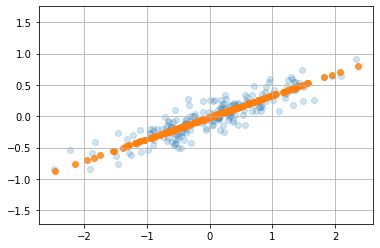

In [11]:
xNew = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(xNew[:, 0], xNew[:, 1], alpha=0.8)
plt.axis('equal')
plt.grid()

---

## Exercise 2: Principal Component Analysis on Hand-Written digits

We load a dataset containing hand-written digits

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

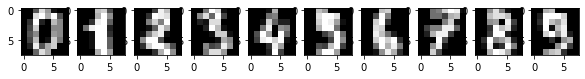

In [13]:
fig, ax = plt.subplots(ncols=10, figsize=(10, 5))
for i in range(10):
    some_digit = digits.images[i]
    ax[i].imshow(some_digit, cmap='gray')
    
#

##### __Task (a): Answer by Hand: Choose a suitable number of components based on the plot below__

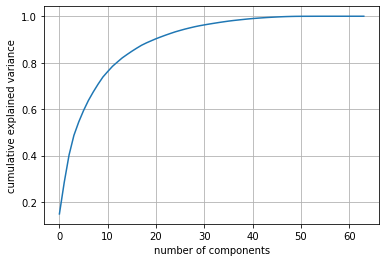

In [14]:
pca = PCA(n_components=64).fit(digits.data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))#Wieviel Daten abgedeckt werden. 
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

In [15]:
print(digits.target)

[0 1 2 ... 8 9 8]


bei einer Varianz von 1 haben wir ca. 45 Komponenten

##### __Task (b): Plot the digits__

We will try to make a scatter-plot of the digits in a 2D space. Therefore, we have to reduce the dimensionality to `n_components=2`.
- **Answer by Hand:** Do you think 2 components is enough for a classifier to distinguish the digits? Based on the plot above: How big is the cumulative explained variance?

Do the following:
1. Reduce the dimensionality of the data to 2D using PCA
2. plot the result using a scatter plot
   - Color the points based on their class (`digits.target`)



In [16]:
pca = PCA(2) #TRansformation auf 2te Dimension
projected = pca.fit_transform(digits.data)
print('Shape of digits.data: ', digits.data.shape)
print('Shape of transformed digits.data: ', projected.shape)

Shape of digits.data:  (1797, 64)
Shape of transformed digits.data:  (1797, 2)


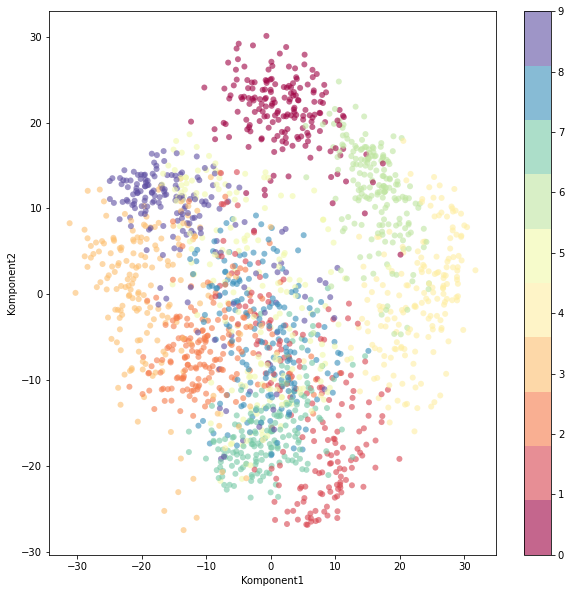

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(projected[:, 0], projected[:, 1], 
            c=digits.target, edgecolor='none', alpha=0.6, 
            cmap=plt.cm.get_cmap('Spectral',10))
plt.xlabel('Komponent1')
plt.ylabel('Komponent2')
plt.colorbar()

##### __Task (c): Review your answer from above: Do you think two components are enough to distinguish digits?__

... TODO ...

In [18]:
#Einige Daten sind relativ gut separiert(0, 1, 4, 6). Wiederrum andere nicht. Wenn wir es granularer machen
#wollen müssen wir es auf mehr dimensionen aufteilen bzw, Dimension 2 ist zu wenig. 

---
## Exercise 3: Frequent Itemset Generation

In [81]:
import sys

!pip install efficient_apriori

In [95]:
import pandas as pd
import numpy as np
import time

df = pd.read_csv('transactions.csv')
df

,timestamp,transaction,item
0,1617719006,1,beer
1,1617719007,1,whiskey
2,1617719008,1,whiskey
3,1617719009,1,chips
4,1617719010,1,ice cream
...,...,...,...
267006,1617941572,55554,ice cream
267007,1617941573,55554,chips
267008,1617941574,55554,rum
267009,1617941575,55554,beer


##### __(a) Create the frequent itemsets for the data file transactions.csv by using the library `efficient_apriori`. Minimum support is 0.25 and minimum confidence 0.7.__

Hint: Use the function `efficient_apriori.apriori(...)`

In [96]:

itemsets = df.groupby('transaction')['item'].unique()
transactions = [tuple(row) for row in itemsets]
transactions



[('beer', 'whiskey', 'chips', 'ice cream', 'pizza'),
 ('ice cream', 'beer', 'rum', 'coke'),
 ('rum', 'chips', 'coke'),
 ('pizza', 'cheese'),
 ('whiskey', 'coke', 'cheese', 'pizza'),
 ('cheese', 'ice cream'),
 ('rum', 'coke', 'whiskey', 'chips'),
 ('whiskey', 'chips'),
 ('cheese', 'beer', 'coke'),
 ('whiskey', 'coke', 'cheese', 'pizza'),
 ('rum',),
 ('rum', 'ice cream', 'pizza', 'beer'),
 ('coke', 'apples'),
 ('chips', 'whiskey', 'ice cream'),
 ('whiskey', 'coke', 'cheese', 'pizza'),
 ('cheese', 'ice cream', 'whiskey', 'chips'),
 ('apples', 'coke'),
 ('rum', 'pizza', 'beer'),
 ('whiskey', 'apples', 'rum', 'chips'),
 ('whiskey', 'coke', 'cheese', 'pizza'),
 ('ice cream', 'apples', 'pizza', 'cheese', 'rum', 'coke'),
 ('rum', 'cheese', 'chips'),
 ('apples', 'cheese', 'rum', 'chips', 'coke'),
 ('coke',
  'apples',
  'pizza',
  'ice cream',
  'cheese',
  'chips',
  'beer',
  'whiskey'),
 ('whiskey', 'coke', 'cheese', 'pizza'),
 ('beer', 'apples'),
 ('cheese', 'whiskey', 'pizza', 'chips'),
 (

In [97]:

import efficient_apriori
efficient_apriori.apriori(transactions, min_support=0.25, min_confidence=0.7)

({1: {('beer',): 18729,
   ('whiskey',): 29732,
   ('chips',): 18803,
   ('ice cream',): 18617,
   ('pizza',): 29736,
   ('rum',): 18542,
   ('coke',): 29774,
   ('cheese',): 29865,
   ('apples',): 18627},
  2: {('cheese', 'coke'): 19448,
   ('cheese', 'pizza'): 19433,
   ('cheese', 'whiskey'): 19441,
   ('coke', 'pizza'): 19445,
   ('coke', 'whiskey'): 19357,
   ('pizza', 'whiskey'): 19331},
  3: {('cheese', 'coke', 'pizza'): 14914,
   ('cheese', 'coke', 'whiskey'): 14941,
   ('cheese', 'pizza', 'whiskey'): 14899,
   ('coke', 'pizza', 'whiskey'): 14913}},
 [{coke, pizza} -> {cheese},
  {cheese, pizza} -> {coke},
  {cheese, coke} -> {pizza},
  {coke, whiskey} -> {cheese},
  {cheese, whiskey} -> {coke},
  {cheese, coke} -> {whiskey},
  {pizza, whiskey} -> {cheese},
  {cheese, whiskey} -> {pizza},
  {cheese, pizza} -> {whiskey},
  {pizza, whiskey} -> {coke},
  {coke, whiskey} -> {pizza},
  {coke, pizza} -> {whiskey}])

##### __(b) Create the frequent itemsets for the data file transactions.csv by using a self-implemented python function using the naive approach without pruning.  Minimum support is 0.25 and minimum confidence 0.7.__

In [99]:
import itertools

# True if all items of b can be found in a:
def a_contains_b(a, b):
    return all(b_item in a for b_item in b)

def naive_frequent_itemsets(transactions, min_support, min_confidence):
    # reduce to unique single items
    unique_items = []
    for transaction in transactions:
        for item in transaction:
            if not item in unique_items:
                unique_items.append(item)
    
    # generate unique combinations of items for all
    # lengths between 1 and len(unique_items):
    unique_itemsets = []
    for i in range(1, len(unique_items)):
        unique_itemsets.extend(list(itertools.combinations(unique_items, i)))#Im Array unique_itemsets werden weitere Array hereingestellt mit den Items

    frequent_itemsets = {} #create a empty dict
    transactions_count = len(transactions)

    # count occurence of each unique item combination:
    for unique_itemset in unique_itemsets:
        itemset_count = len(list(filter(lambda transaction: a_contains_b(transaction, unique_itemset), transactions)))
        itemset_support = itemset_count / transactions_count

        # keep itemset if its support value is
        # higher than the min_support threshold:
        if itemset_support >= min_support:
            itemset_size = len(unique_itemset)
            if not itemset_size in frequent_itemsets:
                frequent_itemsets[itemset_size] = {}
            frequent_itemsets[itemset_size][unique_itemset] = itemset_count

    return frequent_itemsets

In [100]:
naive_frequent_itemsets(transactions, 0.25, 0.7)

{1: {('beer',): 18729,
  ('whiskey',): 29732,
  ('chips',): 18803,
  ('ice cream',): 18617,
  ('pizza',): 29736,
  ('rum',): 18542,
  ('coke',): 29774,
  ('cheese',): 29865,
  ('apples',): 18627},
 2: {('whiskey', 'pizza'): 19331,
  ('whiskey', 'coke'): 19357,
  ('whiskey', 'cheese'): 19441,
  ('pizza', 'coke'): 19445,
  ('pizza', 'cheese'): 19433,
  ('coke', 'cheese'): 19448},
 3: {('whiskey', 'pizza', 'coke'): 14913,
  ('whiskey', 'pizza', 'cheese'): 14899,
  ('whiskey', 'coke', 'cheese'): 14941,
  ('pizza', 'coke', 'cheese'): 14914}}

##### __(c) Create the frequent itemsets for the data file transactions.csv by using a self-implemented python function using the apriori approach with pruning. Minimum support is 0.25 and minimum confidence 0.7.__

In [101]:
import itertools

# True if all items of b can be found in a:
def a_contains_b(a, b):
    return all(b_item in a for b_item in b)

def apriori_frequent_itemsets (transactions, min_support, min_confidence):
    # reduce to unique items
    itemset = []
    for transaction in transactions:
        for item in transaction:
            if not item in itemset:
                itemset.append(item)
    
    
    transactions_count = len(transactions)

    k = 1
    candidate_itemset_k = itertools.combinations(itemset, 1)
    frequent_itemset_k = {}
    frequent_itemsets = {}

    while True:
        for candidate in candidate_itemset_k:
            candidate_count = len(list(filter(lambda transaction: a_contains_b(transaction, candidate), transactions)))
            candidate_support = candidate_count / transactions_count

            # copy candidate itemset to frequent itemsets if its
            # support value is higher than the min_support threshold:
            if candidate_support >= min_support:
                frequent_itemset_k[candidate] = candidate_count
        
        if len(frequent_itemset_k) > 0:
            frequent_itemsets[k] = frequent_itemset_k
        else:
            break

        # join & prune:
        # Join each two frequent itemsets of length k that differ only in one item
        # (e.g. ACE, ADE -> ACDE)
        # Check for the two newly combined items (CD) if they are frequent –
        # otherwise prune

        candidate_itemset_k = []
        for a in frequent_itemset_k:
            for b in frequent_itemset_k:
                if not a is b:
                    not_in_b = list(filter(lambda a_item: a_item not in b, a))
                    not_in_a = list(filter(lambda b_item: b_item not in a, b))

                    if not not_in_a is not_in_b and len(not_in_a) == 1 and len(not_in_b) == 1:
                        candidate = a[:]
                        candidate += tuple(not_in_a)
                        candidate = tuple(sorted(candidate))

                        if not candidate in candidate_itemset_k:
                            candidate_itemset_k.append(candidate)

        k += 1
        frequent_itemset_k = {}

    return frequent_itemsets

In [115]:
import time

tic = time.perf_counter()
apriori_frequent_itemsets (transactions, 0.25, 0.7)
toc = time.perf_counter()
print(f"Time for Prozess {toc - tic:0.4f} seconds")

Time for Prozess 1.3332 seconds


In [111]:
tic = time.perf_counter()
naive_frequent_itemsets(transactions, 0.25, 0.7)
toc = time.perf_counter()
print(f"Time for Prozess {toc - tic:0.4f} seconds")

Time for Prozess 14.2483 seconds


##### __(d) Compare the execution time of all three approaches (a, b, and c) against each other.__

---
## Exercise 4: Association Rule Generation

##### __(b) Generate the association rules for the data in the transactions.csv file with the apriori algorithm from the lecture.__

['cheese', 'coke'] -> ['pizza'] , confidence = 0.767
['cheese', 'pizza'] -> ['coke'] , confidence = 0.767
['coke', 'pizza'] -> ['cheese'] , confidence = 0.767
['cheese', 'coke'] -> ['whiskey'] , confidence = 0.768
['cheese', 'whiskey'] -> ['coke'] , confidence = 0.769
['coke', 'whiskey'] -> ['cheese'] , confidence = 0.772
['cheese', 'pizza'] -> ['whiskey'] , confidence = 0.767
['cheese', 'whiskey'] -> ['pizza'] , confidence = 0.766
['pizza', 'whiskey'] -> ['cheese'] , confidence = 0.771
['coke', 'pizza'] -> ['whiskey'] , confidence = 0.767
['coke', 'whiskey'] -> ['pizza'] , confidence = 0.77
['pizza', 'whiskey'] -> ['coke'] , confidence = 0.771
